### <a id='toc1_1_1_'></a>[Introduce](#toc0_)

Hello in this project i'd like to show some basic of data wrangling and cleaning on Apple stock prices :)

**Table of contents**<a id='toc0_'></a>    
- [Introduce](#toc1_1_1_)    
    - [Loading libraries](#toc1_1_2_)    
    - [Loading data](#toc1_1_2_1_)    
    - [Preprocessing data for analysis](#toc1_1_3_)    
    - [Desctriptive statistics](#toc1_1_4_)    
    - [Stock prices over the years](#toc1_1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_2_'></a>[Loading libraries](#toc0_)

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")

#### <a id='toc1_1_2_1_'></a>[Loading data](#toc0_)

In [63]:
market = pd.read_csv("AAPL Historical Data.csv", decimal=",", parse_dates = ["Date"]).sort_values("Date").reset_index().drop(columns = "index")

### <a id='toc1_1_3_'></a>[Preprocessing data for analysis](#toc0_)

In [64]:
## Market first 10 rows
print(market.head(10))

        Date  Price   Open   High    Low     Vol. Change %
0 2013-05-01  15.69  15.87  15.89  15.51  507.16M   -0.76%
1 2013-05-02  15.91  15.78  16.02  15.74  422.03M    1.40%
2 2013-05-03  16.07  16.12  16.19  16.04  361.53M    1.01%
3 2013-05-06  16.45  16.28  16.51  16.23  496.64M    2.36%
4 2013-05-07  16.38  16.61  16.63  16.20  483.75M   -0.43%
5 2013-05-08  16.57  16.39  16.62  16.28  472.60M    1.16%
6 2013-05-09  16.31  16.42  16.54  16.27  398.75M   -1.57%
7 2013-05-10  16.18  16.36  16.42  16.09  334.85M   -0.80%
8 2013-05-13  16.24  16.13  16.35  16.12  317.11M    0.37%
9 2013-05-14  15.85  16.21  16.26  15.79  447.12M   -2.40%


In [65]:
## Market last 10 rows
print(market.tail())

           Date   Price    Open    High     Low    Vol. Change %
2514 2023-04-25  163.77  165.19  166.30  163.73  48.17M   -0.94%
2515 2023-04-26  163.76  163.05  165.28  162.80  44.11M   -0.01%
2516 2023-04-27  168.41  165.19  168.56  165.19  64.22M    2.84%
2517 2023-04-28  169.68  168.49  169.85  167.88  55.28M    0.75%
2518 2023-05-01  169.59  169.28  170.45  168.64  49.39M   -0.05%


In [66]:
### Changing col name "Vol." for better view
market = market.rename(columns = {"Vol.":"Vol"})

In [67]:
# Remove all letters in dataframe using regular expression expect dots.
market[["Price", "Open", "High", "Low"]] = market[["Price", "Open", "High", "Low"]].replace('[^0-9\.]+', '', regex=True)
## Unit M means milion

### Drop also change%
market = market.drop(columns = "Change %")
print(market)

           Date   Price    Open    High     Low      Vol
0    2013-05-01   15.69   15.87   15.89   15.51  507.16M
1    2013-05-02   15.91   15.78   16.02   15.74  422.03M
2    2013-05-03   16.07   16.12   16.19   16.04  361.53M
3    2013-05-06   16.45   16.28   16.51   16.23  496.64M
4    2013-05-07   16.38   16.61   16.63   16.20  483.75M
...         ...     ...     ...     ...     ...      ...
2514 2023-04-25  163.77  165.19  166.30  163.73   48.17M
2515 2023-04-26  163.76  163.05  165.28  162.80   44.11M
2516 2023-04-27  168.41  165.19  168.56  165.19   64.22M
2517 2023-04-28  169.68  168.49  169.85  167.88   55.28M
2518 2023-05-01  169.59  169.28  170.45  168.64   49.39M

[2519 rows x 6 columns]


In [68]:
# Checking for missing values
print(market.isnull().sum().sort_values(ascending=False))

Vol      1
Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64


In [69]:
# Drop missing value
print(market[market["Vol"].isnull()])
market = market.dropna()

          Date  Price   Open   High    Low  Vol
712 2016-02-27  96.95  96.95  96.95  96.95  NaN


In [70]:
print(market.isna().any())

Date     False
Price    False
Open     False
High     False
Low      False
Vol      False
dtype: bool


In [71]:
print(market.head(10))

        Date  Price   Open   High    Low      Vol
0 2013-05-01  15.69  15.87  15.89  15.51  507.16M
1 2013-05-02  15.91  15.78  16.02  15.74  422.03M
2 2013-05-03  16.07  16.12  16.19  16.04  361.53M
3 2013-05-06  16.45  16.28  16.51  16.23  496.64M
4 2013-05-07  16.38  16.61  16.63  16.20  483.75M
5 2013-05-08  16.57  16.39  16.62  16.28  472.60M
6 2013-05-09  16.31  16.42  16.54  16.27  398.75M
7 2013-05-10  16.18  16.36  16.42  16.09  334.85M
8 2013-05-13  16.24  16.13  16.35  16.12  317.11M
9 2013-05-14  15.85  16.21  16.26  15.79  447.12M


In [72]:
# Convert data 
market[["Price", "Open", "High", "Low"]] = market[["Price", "Open", "High", "Low"]].astype(float)
print(market.info())
print(market.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2518 entries, 0 to 2518
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2518 non-null   datetime64[ns]
 1   Price   2518 non-null   float64       
 2   Open    2518 non-null   float64       
 3   High    2518 non-null   float64       
 4   Low     2518 non-null   float64       
 5   Vol     2518 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 137.7+ KB
None
        Date  Price   Open   High    Low      Vol
0 2013-05-01  15.69  15.87  15.89  15.51  507.16M
1 2013-05-02  15.91  15.78  16.02  15.74  422.03M
2 2013-05-03  16.07  16.12  16.19  16.04  361.53M
3 2013-05-06  16.45  16.28  16.51  16.23  496.64M
4 2013-05-07  16.38  16.61  16.63  16.20  483.75M


### <a id='toc1_1_4_'></a>[Desctriptive statistics](#toc0_)

In [73]:
print(round(market.describe(),2))

                                Date    Price     Open     High      Low
count                           2518  2518.00  2518.00  2518.00  2518.00
mean   2018-04-29 18:48:19.444003328    66.83    66.78    67.54    66.06
min              2013-05-01 00:00:00    14.06    13.98    14.30    13.89
25%              2015-10-28 06:00:00    27.86    27.84    28.09    27.46
50%              2018-04-30 12:00:00    43.26    43.30    43.70    42.96
75%              2020-10-27 18:00:00   118.68   118.70   120.26   116.72
max              2023-05-01 00:00:00   182.01   182.63   182.94   179.12
std                              NaN    50.48    50.43    51.09    49.81


### <a id='toc1_1_5_'></a>[Stock price of Apple over the years](#toc0_)

Text(0.5, 1.0, 'Stock Prices of Apple over the Years')

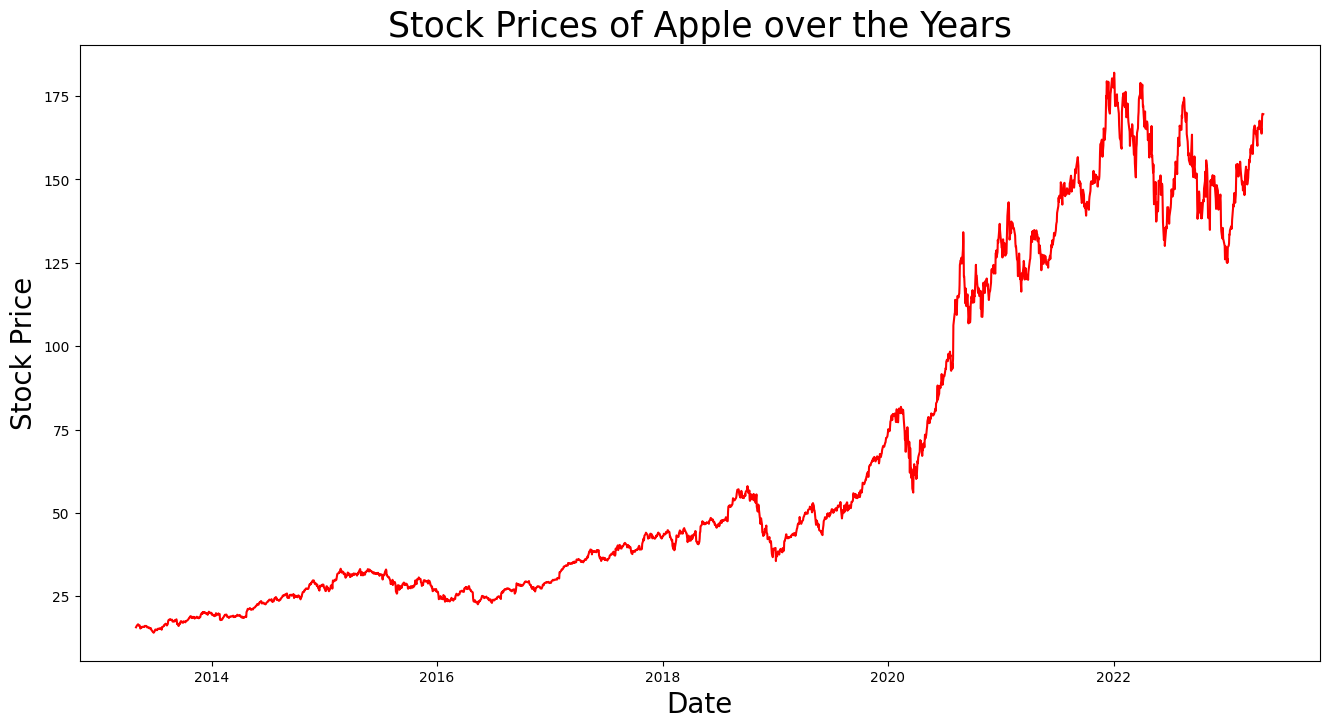

In [74]:
market.set_index("Date", inplace = True)
plt.figure(figsize=(16,8))
plt.plot(market["Price"], color = "r")
plt.xlabel("Date",size=20)
plt.ylabel("Stock Price",size=20)
plt.title("Stock Prices of Apple over the Years",size=25)